# Implementing a 3-layer Neural Network

In [1]:
import numpy as np

In [2]:
inp_size = 2 #no of features
layers=[4,3] #no of neurons in first and second layer (hidden layers)
out_size=2 #size of output layer

In [3]:
class Neural_Network:
    
    #1. Neural Network Architecture
    def __init__(self,isize,layers,osize):
        np.random.seed(0)
        
        model={}
        model['w1']=np.random.randn(isize,layers[0]) # matrix for first hidden layer
        model['w2']=np.random.randn(model['w1'].shape[1],layers[1]) #matrix for second hidden layer
        model['w3']=np.random.randn(model['w2'].shape[1],osize) #matrix for output layer
        
        model['b1']=np.zeros((1,layers[0])) #bias for first hidden layer
        model['b2']=np.zeros((1,layers[1])) #bias for second hidden layer
        model['b3']=np.zeros((1,osize)) #bias for output layer
        
        self.model=model
    
    #2. Forward Propagation - Passing data to the neural network created
    def For_prop(self,inp_x):
        
        #Unpacking all the values from dictionary
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        #First Hidden Layer
        z1 = np.dot(inp_x,w1) + b1
        a1 = np.tanh(z1) #Transforms value in range -1 to 1
        
        #Second Hidden Layer
        z2=np.dot(a1,w2) + b2
        a2= np.tanh(z2)
        
        #Output Layer
        z3=np.dot(a2,w3) + b3
        y_hat = cal_soft(z3) #Softmax Function : defined later
        
        #Store outputs
        self.outputs=(a1,a2,y_hat)
        return y_hat
    
    #3. Back Propagation
    def back_prop(self,x,y,lr=0.001):
        #Unpacking all the values from dictionary
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_hat = self.outputs
        
        m=x.shape[0] #input is of mxn size m data points(no of inp layer neurons) and n features for each m
        
        #Compute values for final output layer first        
        delta3 = y_hat-y
        delta3_w = np.dot(a2.T,delta3)
        delta3_b = np.sum(delta3,axis=0)
        
        #second hidden layer
        delta2 = (1-np.square(a2))*np.dot(delta3,w3.T)
        delta2_w = np.dot(a1.T,delta2)
        delta2_b = np.sum(delta2,axis=0)
        
        #first hidden layer
        delta1 = (1-np.square(a1))*np.dot(delta2,w2.T)
        delta1_w = np.dot(x.T,delta1)
        delta1_b = np.sum(delta1,axis=0)
        
        #Update Values using Gradient descent
        self.model['w1'] -= lr*delta1_w
        self.model['b1'] -= lr*delta1_b
        self.model['w2'] -= lr*delta2_w
        self.model['b2'] -= lr*delta2_b
        self.model['w3'] -= lr*delta3_w
        self.model['b3'] -= lr*delta3_b
    
    #4. Predict Function
    def predict(self,x):
        y_hat=self.For_prop(x)
        return np.argmax(y_hat,axis=1)
    
    #5. A function which provides details about model created
    def print_info(self):
        
        #Unpacking all the values from dictionary
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_hat = self.outputs
        
        print("W1: ",w1.shape)
        print("A1: ",a1.shape)
        print("W2: ",w2.shape)
        print("A2: ",a2.shape)
        print("W3: ",w3.shape)
        print("Y_hat: ",y_hat.shape)

In [4]:
#Softmax Function
def cal_soft(a):
    num=np.exp(a)
    den=np.sum(num,axis=1,keepdims=True)
    return (num/den)

In [5]:
# Loss Function
def cal_loss(y_hat,p):
    l=(-1)*np.mean(y_hat*np.log(p))
    return l

In [6]:
# One hot Encoding
def one_hot_encoding(output_matrix,depth):
    m=output_matrix.shape[0]
    y_hot = np.zeros((m,depth))
    y_hot[np.arange(m),output_matrix]=1
    
    return y_hot

# Create a dataset for the Neural Network

In [7]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [8]:
x_data,y_data=make_moons(n_samples=500,noise=0.2,random_state=42)

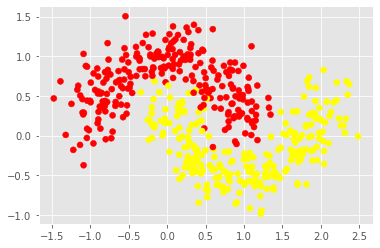

In [9]:
plt.style.use('ggplot')
plt.scatter(x_data[:,0],x_data[:,1],c=y_data,cmap=plt.cm.autumn)
plt.show()

# Understanding one hot encoding - Test

In [10]:
print(y_data)

[1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 0 

In [11]:
y_data_onehot=one_hot_encoding(y_data,3)
print(y_data_onehot)

# we are going to put this data into our neural network not the original data

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


# Training the Neural Network

In [12]:
# create model object
my_model = Neural_Network(isize=2,layers=[10,5],osize=2)

#passing just one example 
my_model.For_prop([x_data[0]])

array([[0.58900505, 0.41099495]])

In [13]:
# this gave probability of the data point belonging to class 0 and 1 resp

In [14]:
my_model.For_prop(x_data)

array([[0.58900505, 0.41099495],
       [0.55210486, 0.44789514],
       [0.576939  , 0.423061  ],
       [0.37064732, 0.62935268],
       [0.593031  , 0.406969  ],
       [0.57274627, 0.42725373],
       [0.56241533, 0.43758467],
       [0.54041363, 0.45958637],
       [0.56577709, 0.43422291],
       [0.54703959, 0.45296041],
       [0.55601898, 0.44398102],
       [0.36435395, 0.63564605],
       [0.57186899, 0.42813101],
       [0.54967099, 0.45032901],
       [0.56954096, 0.43045904],
       [0.5730825 , 0.4269175 ],
       [0.52182785, 0.47817215],
       [0.55356216, 0.44643784],
       [0.63511147, 0.36488853],
       [0.54427904, 0.45572096],
       [0.52282293, 0.47717707],
       [0.51675817, 0.48324183],
       [0.39610853, 0.60389147],
       [0.57059966, 0.42940034],
       [0.56397166, 0.43602834],
       [0.530384  , 0.469616  ],
       [0.53095832, 0.46904168],
       [0.3957645 , 0.6042355 ],
       [0.58350413, 0.41649587],
       [0.64844808, 0.35155192],
       [0.

In [15]:
my_model.print_info()

W1:  (2, 10)
A1:  (500, 10)
W2:  (10, 5)
A2:  (500, 5)
W3:  (5, 2)
Y_hat:  (500, 2)


In [16]:
# Create a training function
def train_nnwk(x,y,epochs,lr,logs=True):
    losses=[]
    class_no = 2
    y_data_onehot=one_hot_encoding(y,2)
    for i in range(epochs):
        y_hat=my_model.For_prop(x)
        l=cal_loss(y_data_onehot,y_hat)
        my_model.back_prop(x,y_data_onehot,lr)
        
        if(logs):
            print("Loss at epoch ",i," is: ",l)
            losses.append(l)
    return losses

In [17]:
l=train_nnwk(x_data,y_data,500,0.001)

Loss at epoch  0  is:  0.3997911218929375
Loss at epoch  1  is:  0.20312936603977347
Loss at epoch  2  is:  0.17435327789851623
Loss at epoch  3  is:  0.15778636485038214
Loss at epoch  4  is:  0.1467741085488334
Loss at epoch  5  is:  0.13909756952178323
Loss at epoch  6  is:  0.13420118825381347
Loss at epoch  7  is:  0.13277671731387433
Loss at epoch  8  is:  0.13712703746115615
Loss at epoch  9  is:  0.1509362036187687
Loss at epoch  10  is:  0.16638891423266408
Loss at epoch  11  is:  0.181274246841662
Loss at epoch  12  is:  0.1611661316935575
Loss at epoch  13  is:  0.1585936317877141
Loss at epoch  14  is:  0.1360824158374635
Loss at epoch  15  is:  0.13389061301887234
Loss at epoch  16  is:  0.1234258836909879
Loss at epoch  17  is:  0.12308065612048999
Loss at epoch  18  is:  0.11711161698164077
Loss at epoch  19  is:  0.11809989654633977
Loss at epoch  20  is:  0.113706039431891
Loss at epoch  21  is:  0.11568334037744682
Loss at epoch  22  is:  0.11164976683444452
Loss at e

Loss at epoch  194  is:  0.028797679429476693
Loss at epoch  195  is:  0.028746434319238613
Loss at epoch  196  is:  0.0286953605506387
Loss at epoch  197  is:  0.028645292887990472
Loss at epoch  198  is:  0.0285954535628535
Loss at epoch  199  is:  0.028546504516273826
Loss at epoch  200  is:  0.02849782541334485
Loss at epoch  201  is:  0.02844993974013855
Loss at epoch  202  is:  0.028402353446571646
Loss at epoch  203  is:  0.028355479344658905
Loss at epoch  204  is:  0.02830892449434903
Loss at epoch  205  is:  0.028263013443379854
Loss at epoch  206  is:  0.028217434054790876
Loss at epoch  207  is:  0.028172440650472644
Loss at epoch  208  is:  0.02812778554883443
Loss at epoch  209  is:  0.028083667333682817
Loss at epoch  210  is:  0.02803988964498889
Loss at epoch  211  is:  0.027996606938151272
Loss at epoch  212  is:  0.027953663644499104
Loss at epoch  213  is:  0.02791117937282798
Loss at epoch  214  is:  0.027869030920384293
Loss at epoch  215  is:  0.02782731045253539

Loss at epoch  377  is:  0.02356058301012284
Loss at epoch  378  is:  0.023542769732229546
Loss at epoch  379  is:  0.023525019303970354
Loss at epoch  380  is:  0.02350733131558364
Loss at epoch  381  is:  0.02348970535818676
Loss at epoch  382  is:  0.023472141030641245
Loss at epoch  383  is:  0.02345463793275757
Loss at epoch  384  is:  0.023437195671792053
Loss at epoch  385  is:  0.023419813856010135
Loss at epoch  386  is:  0.023402492100840888
Loss at epoch  387  is:  0.023385230022773713
Loss at epoch  388  is:  0.02336802724519422
Loss at epoch  389  is:  0.02335088339259152
Loss at epoch  390  is:  0.023333798096097445
Loss at epoch  391  is:  0.02331677098798298
Loss at epoch  392  is:  0.023299801706921315
Loss at epoch  393  is:  0.02328288989275371
Loss at epoch  394  is:  0.023266035191495157
Loss at epoch  395  is:  0.02324923725035157
Loss at epoch  396  is:  0.02323249572248528
Loss at epoch  397  is:  0.023215810262266857
Loss at epoch  398  is:  0.02319918052981657

In [18]:
l

[0.3997911218929375,
 0.20312936603977347,
 0.17435327789851623,
 0.15778636485038214,
 0.1467741085488334,
 0.13909756952178323,
 0.13420118825381347,
 0.13277671731387433,
 0.13712703746115615,
 0.1509362036187687,
 0.16638891423266408,
 0.181274246841662,
 0.1611661316935575,
 0.1585936317877141,
 0.1360824158374635,
 0.13389061301887234,
 0.1234258836909879,
 0.12308065612048999,
 0.11711161698164077,
 0.11809989654633977,
 0.113706039431891,
 0.11568334037744682,
 0.11164976683444452,
 0.11427296944559748,
 0.10995485814651265,
 0.11278880486991132,
 0.10797598266277039,
 0.11060496635030126,
 0.10549236763187324,
 0.10767923517432526,
 0.10263604212845434,
 0.10435881032297445,
 0.09966588814390542,
 0.10103544376626027,
 0.09679830405038901,
 0.09795883467152228,
 0.09415536016940826,
 0.095225627335697,
 0.09177417927634723,
 0.09282818494722658,
 0.08963101763007761,
 0.0906986759233839,
 0.08766414332484963,
 0.0887390935780286,
 0.08579387636940178,
 0.08684431458100104,
 0.

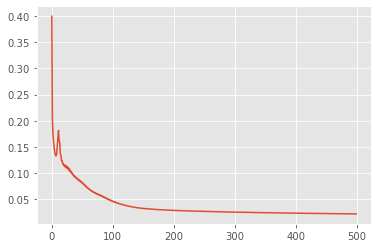

In [19]:
plt.plot(l)
plt.show()

In [20]:
from visualize import plot_decision_boundary

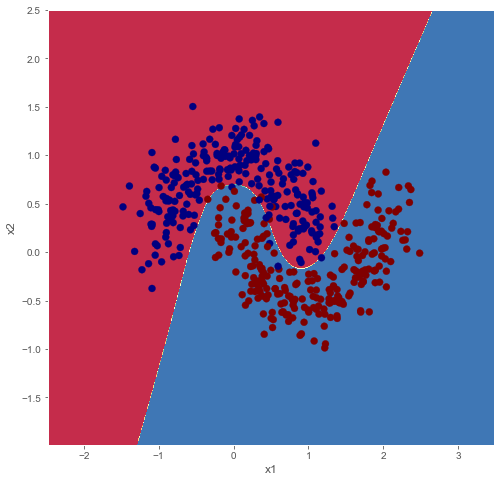

In [21]:
plot_decision_boundary(lambda x:my_model.predict(x),x_data,y_data)

In [22]:
from sklearn.datasets import make_circles

In [23]:
x_data,y_data=make_circles(n_samples=400,noise=0.01,random_state=42)

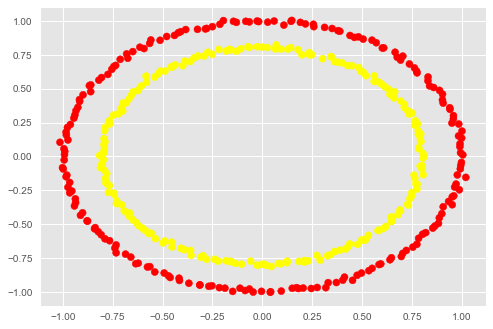

In [24]:
plt.style.use('ggplot')
plt.scatter(x_data[:,0],x_data[:,1],c=y_data,cmap=plt.cm.autumn)
plt.show()

In [25]:
my_model.For_prop(x_data)

array([[9.83050923e-01, 1.69490772e-02],
       [9.95776435e-01, 4.22356468e-03],
       [9.96920139e-01, 3.07986121e-03],
       [9.86170107e-01, 1.38298933e-02],
       [9.99819781e-01, 1.80218643e-04],
       [9.99578354e-01, 4.21646062e-04],
       [9.52195418e-04, 9.99047805e-01],
       [9.99831516e-01, 1.68483817e-04],
       [9.84864742e-01, 1.51352585e-02],
       [1.04649324e-02, 9.89535068e-01],
       [9.94905721e-01, 5.09427936e-03],
       [3.17764010e-04, 9.99682236e-01],
       [9.98972363e-01, 1.02763750e-03],
       [9.99706177e-01, 2.93822721e-04],
       [7.08425729e-04, 9.99291574e-01],
       [9.95461489e-01, 4.53851072e-03],
       [9.94464212e-01, 5.53578755e-03],
       [1.14748479e-03, 9.98852515e-01],
       [9.79563455e-01, 2.04365447e-02],
       [2.48753772e-02, 9.75124623e-01],
       [9.99580772e-01, 4.19228218e-04],
       [9.97628347e-01, 2.37165273e-03],
       [2.89419159e-01, 7.10580841e-01],
       [9.91038766e-01, 8.96123355e-03],
       [9.486326

In [26]:
l=train_nnwk(x_data,y_data,500,0.001)

Loss at epoch  0  is:  1.2283689828516569
Loss at epoch  1  is:  1.3158125454986793
Loss at epoch  2  is:  0.5623965375617843
Loss at epoch  3  is:  0.48290891103288724
Loss at epoch  4  is:  0.43042989058834086
Loss at epoch  5  is:  0.38920554009423897
Loss at epoch  6  is:  0.3599563355639949
Loss at epoch  7  is:  0.3467768492529791
Loss at epoch  8  is:  0.3533246766782854
Loss at epoch  9  is:  0.4055139481718982
Loss at epoch  10  is:  0.3320209442495486
Loss at epoch  11  is:  0.34272487917883593
Loss at epoch  12  is:  0.3339346999702719
Loss at epoch  13  is:  0.35050053656307617
Loss at epoch  14  is:  0.3218199687475016
Loss at epoch  15  is:  0.3233794249245707
Loss at epoch  16  is:  0.31990468892433355
Loss at epoch  17  is:  0.32382811509340814
Loss at epoch  18  is:  0.31894739556298063
Loss at epoch  19  is:  0.32480222647248314
Loss at epoch  20  is:  0.3171910265941094
Loss at epoch  21  is:  0.32359274919087033
Loss at epoch  22  is:  0.31513453517315454
Loss at ep

Loss at epoch  241  is:  0.041942220902735326
Loss at epoch  242  is:  0.04770800298954482
Loss at epoch  243  is:  0.05653988608361286
Loss at epoch  244  is:  0.09473193739155798
Loss at epoch  245  is:  0.30704594801995233
Loss at epoch  246  is:  0.6566837127617972
Loss at epoch  247  is:  1.181574754985937
Loss at epoch  248  is:  0.5813070033310686
Loss at epoch  249  is:  0.19901318469812235
Loss at epoch  250  is:  0.11275157815625118
Loss at epoch  251  is:  0.09826237898350393
Loss at epoch  252  is:  0.0944707491011179
Loss at epoch  253  is:  0.09208173968864246
Loss at epoch  254  is:  0.0901065053085308
Loss at epoch  255  is:  0.08838668155936907
Loss at epoch  256  is:  0.08684633846854119
Loss at epoch  257  is:  0.08544074000644646
Loss at epoch  258  is:  0.0841381352957304
Loss at epoch  259  is:  0.08291667346052321
Loss at epoch  260  is:  0.08176079467698834
Loss at epoch  261  is:  0.08065902140385778
Loss at epoch  262  is:  0.07960291108020026
Loss at epoch  2

Loss at epoch  428  is:  0.02310775720834326
Loss at epoch  429  is:  0.02299185234538054
Loss at epoch  430  is:  0.02287684526272715
Loss at epoch  431  is:  0.022762725338800145
Loss at epoch  432  is:  0.0226494821195903
Loss at epoch  433  is:  0.022537105314850522
Loss at epoch  434  is:  0.02242558479435308
Loss at epoch  435  is:  0.02231491058421374
Loss at epoch  436  is:  0.02220507286328074
Loss at epoch  437  is:  0.022096061959586875
Loss at epoch  438  is:  0.02198786834686265
Loss at epoch  439  is:  0.021880482641108947
Loss at epoch  440  is:  0.021773895597227283
Loss at epoch  441  is:  0.021668098105706177
Loss at epoch  442  is:  0.02156308118936181
Loss at epoch  443  is:  0.021458836000131543
Loss at epoch  444  is:  0.021355353815918673
Loss at epoch  445  is:  0.021252626037487118
Loss at epoch  446  is:  0.021150644185404303
Loss at epoch  447  is:  0.021049399897031248
Loss at epoch  448  is:  0.02094888492355813
Loss at epoch  449  is:  0.020849091127084343

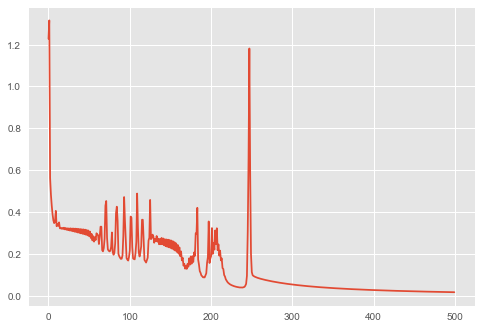

In [27]:
plt.plot(l)
plt.show()

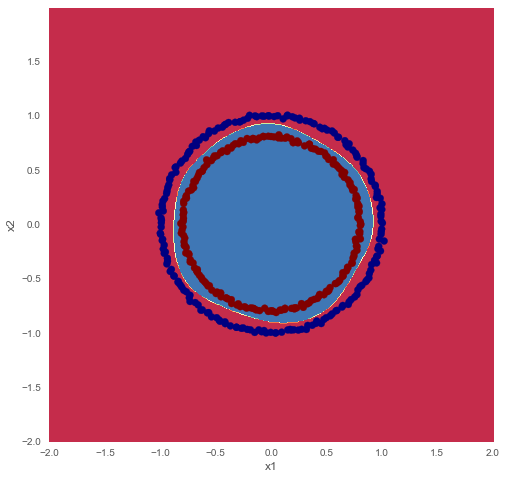

In [28]:
plot_decision_boundary(lambda x:my_model.predict(x),x_data,y_data)